## FYS1120 - LAB 1
**Emil J. Kvernevik**

**På gruppe med: Rachel K. Stiansen, Thea Veidahl, Dans Reinicans**

Date: **02.11.2022**

***

# Før lab 1.1
## Oppgave 1.1.1

Vi har gitt følgende funksjon, som beskriver spenningen $U$ over kondensatoren ved en tid $t$ etter at kretsen er sluttet.
$$U=U_{0}e^{-\dfrac{t}{\tau }}$$

Vi tar først logaritmen til venstresiden, og får at y blir

$$y=ln({U}),$$

Videre, tar vi logaritmen av høyresiden og får at

$$y=ln(U_{0}e^{-\dfrac{t}{\tau }})$$

$$y=ln(U_{0})+ln(e^{-\dfrac{t}{\tau }})$$

$$y=ln(U_{0})-\dfrac{t}{\tau }ln(e)$$
Bruker at $ln(e) = 1$, og får uttrykket på lineær form:

$$y=ln(U_{0})-\dfrac{1}{\tau }t$$

Hvor $y = ln(U)$, $a = -1/τ$, og at $b = ln(U_{0})$

Om vi har en tilpassning til denne lineære funksjonen, eller en gradient $\hat{a}$ til den tilpassede linjen, kan vi finne estimerte resistansen $\hat{R}$, uttrykt ved et estimat av tidskonstanten $\hat{τ}=-1/\hat{a}$ og kapasitansen $C$

$$\tau=RC \implies R=\tau/C$$

$$\hat{R}=-\dfrac{1}{\hat{a}C}$$

## Oppgave 1.1.2

In [24]:
# ========================== Importerer relevante moduler =========================== #

import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

# ============================ Funksjon for å estimere R ============================ #

def estimer_R(U, t, C):
    # funksjon for å estimere R
    # linregress() returnerer mange verdier, men de vi er interessert i er a og b
    res = scs.linregress(t, U)
    a = res.slope
    b = res.intercept
    
    tau = -1/a
    R = tau/C
    
    # lager plottet
    fig, axs = plt.subplots(2)
    fig.suptitle("Lineær og eksponentiell tilpassning")
    
    # plotter den lineære og eksponentielle tilpassningen
    axs[0].scatter(t, np.log(U))
    axs[1].scatter(t, U)
    axs[0].plot(t, a*t + b, c="r")
    axs[1].plot(t, U[0]*np.exp(-t/tau), c="r")
    for ax in axs.flat:
        ax.set(xlabel="Tid (t), i [s]", ylabel="Spenning (U), i [V]")
    plt.show()
    return R

# På lab 1.2
## Oppgave 1.2.1

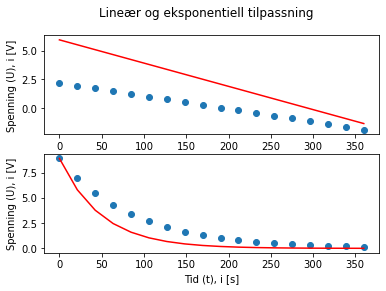

Resistansen er 6.02e+06 [Ohm]


In [25]:
U = np.array([8.9, 7.0, 5.5, 4.32, 3.4, 2.68, 2.11, 1.66, 1.3, 1.02, 0.81, 0.64, 0.5, 0.4, 0.31, 0.25, 0.19, 0.15])
t = np.linspace(0, 360, len(U))

# 1.2.4 - Kondensator lades opp i under ett sekund, og utlades i løpet av 6+ minutter
# 1.2.5 - Kondensatoren lades opp fortere enn den utlades fordi resistansen vil endre 
#         seg når batteriet kobles ut. Dette fører til at tau (tidskonstanten) endrer.

C = 8.2e-6

R = estimer_R(U, t, C)
print(f"Resistansen er {R:.2e} [Ohm]")

# Før lab 2.1
## Oppgave 2.1.1

Skriptet ligner på forrige, med unntak av at vi kun lager én plot, og ikke gjør noe med $a$. Dette skyldes av at vi plotter $U$ mot $I$, og tilpasser en linje, som gjør at gradienten $a$ tilsvarer resistansen i amperemeteret $R_{A}$

In [11]:
# ============================ Funksjon for å estimere R_A ========================== #
def estimer_R_A(I, U):
    # funksjon for å estimere R i amperemeteret
    res = scs.linregress(I, U)
    
    a = res.slope
    b = res.intercept
    
    # plotter U mot I
    plt.scatter(I, U)
    plt.plot(I, b + a*I, c="r")
    plt.xlabel("Strømmen (I), målt i [A]")
    plt.ylabel("Spenningen (U), målt i [V]")
    plt.show()
    return a

# På lab 2.2
## Oppgave 2.2.1

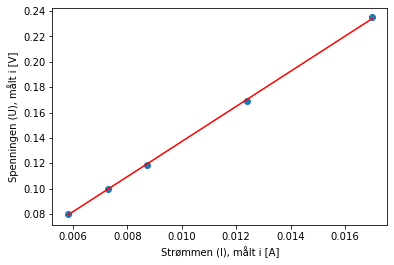

Resistansen i amperemeteret er 13.82 [Omh]


In [13]:
# Trenger også bare verdier

I = np.array([17e-3, 12.4e-3, 8.73e-3, 7.3e-3, 5.8e-3])
U2 = np.array([235e-3, 169e-3, 119e-3, 100e-3, 80.2e-3])

R_A = estimer_R_A(I, U2)
print(f"Resistansen i amperemeteret er {R_A:.2f} [Omh]")

# Før lab 3.1
## Oppgave 3.1.1

Vi får oppgitt at peltier elementet har emf $\varepsilon$ og indre resistans $r$. Vi får også vite at det går en strøm $I$ gjennom elementet. For å finne $U$, bruker vi Kirchoff's spenningslov:

$$\sum _{i}\Delta V_{i}=0,$$

som gir

$$\varepsilon-rI-U=0 \implies U=\varepsilon-rI$$

Siden vi plotter $U$ mot $I$, er $r$ gradienten til den tilpassede linjen og $\varepsilon$ er skjæringspunktet.

## Oppgave 3.1.2

In [18]:
# =========================== Funksjon for peltier-element ========================== #

import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

def estimer_R_peltier(U, R):
    # bruker Ohm's lov for å finne I
    I = U/R
    res = scs.linregress(I, U)
    a = res.slope
    b = res.intercept
    r = -a
    epsilon = b
    
    # plotter U mot I
    plt.scatter(I, U)
    plt.plot(I, b + a*I, c="r")
    plt.xlabel("Strømmen (I), målt i [A]")
    plt.ylabel("Spenningen (U), målt i [V]")
    plt.show()
    return r, epsilon

# På lab 3.2
## Oppgave 3.2.1
Peltier-elementet genererer 2.9e-3mV. Når vi legger elementet i en åpen handflate øker spenningen, og når vi lukker begge hendene om den, blir spenningen negativ. Og som forventet, funker den termoelektriske effekten i revers.

Peltier-elementet genererer spenning utifra temperaturforskjellen; dersom det ikke er temperatur forskjeller, eller at for mye strøm går gjennom elementet, vil spenningen synke.

## Oppgave 3.2.2

Måling på bordet: 1.5mV

Måling på kobber sylinder: -1.4mV

Måling mellom to sylindre (en varm, en kald): 34 mV

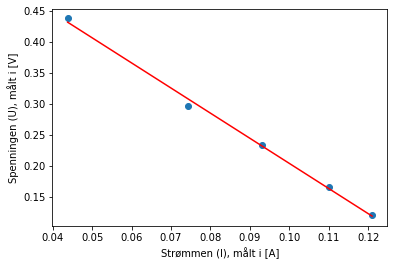

Peltier elementet har resistens: 4.06 [Ohm], og emf: 0.61 [V] 


In [26]:
# Trenger bare verdier
U = np.array([121e-3, 165e-3, 233e-3, 297e-3, 438e-3])
R = np.array([1, 1.5, 2.5, 4, 10])

r, epsilon = estimer_R_peltier(U, R)
print(f"Peltier elementet har resistens: {r:.2f} [Ohm], og emf: {epsilon:.2f} [V] ")

# På lab 4.2
## Oppgave 4.2.1-4.2.2

Med kobber-staven, og inngang P og P1, har vi at målingene blir:
1. $I = 2A$, $U = 0.065mV$
2. $I = 1.6A$, $U = 0.052mV$
3. $I = 1.3A$, $U = 0.043mV$
4. $I = 1A$, $U = 0.033mV$

Med kobber-staven, og inngang C og C1, har vi at målingene blir:
1. $I = 2A$, $U = 2.7mV$
2. $I = 1.6A$, $U = 2.2mV$
3. $I = 1.3A$, $U = 1.8mV$
4. $I = 1A$, $U = 1.4mV$

Med aluminium staven, og inngang P og P1, har vi at målingene blir:
1. $I = 2A$, $U = 0.11mV$
2. $I = 1.6A$, $U = 0.09mV$
3. $I = 1.3A$, $U = 0.074mV
4. $I = 1A$, $U = 0.057mV$

Med aluminium staven, og inngang C og C1, har vi at målingene blir:
1. $I = 2A$, $U = 3.2mV$
2. $I = 1.6A$, $U = 2.5mV$
3. $I = 1.3A$, $U = 2mV$
4. $I = 1A$, $U = 1.6mV$

In [16]:
# ===================================== Finner

U = np.array([0.065e-3, 0.052e-3, 0.043e-3, 0.033e-3])
U1 = np.array([2.7e-3, 2.2e-3, 1.8e-3, 1.4e-3])
U2 = np.array([0.11e-3, 0.09e-3, 0.074e-3, 0.057e-3])
U3 = np.array([3.2e-3, 2.5e-3, 2e-3, 1.6e-3])
I = np.array([2, 1.6, 1.3, 1])

R = U/I
R1 = U1/I
R2 = U2/I
R3 = U3/I
print(R)
print(R1)
print(R2)
print(R3)

[3.25000000e-05 3.25000000e-05 3.30769231e-05 3.30000000e-05]
[0.00135    0.001375   0.00138462 0.0014    ]
[5.50000000e-05 5.62500000e-05 5.69230769e-05 5.70000000e-05]
[0.0016     0.0015625  0.00153846 0.0016    ]


Vi ser at resistansen ikke endrer seg for mye, fordi stavenes ledningsevne ikke varierer, men vi observerer at resistansen er mindre hos kobber-staven. Dette er fordi kobber er en bedre leder. Vi observerer også at resistansen er annerledes mellom de forskjellige inngangene - dette er fordi når vi krysser pluggene, så måler vi spenningsfallet over voltmeteret også. Dette viser at det er bedre å bruke de andre inngangene for å få gode målinger, og kun måle spenningsfallet over staven.

# Før lab 5.1
## Oppgave 5.1.1

Vi vet at ved kontinuerlig rotasjon, vil det ved Faradays lov induseres en emf $\varepsilon$, gitt ved

$$\varepsilon=-\dfrac{d{\varphi}}{dt},$$

hvor $\varphi$ er fluksen gjennom spolen, gitt ved $\varphi=NABcos(\theta)$

Vi finner $X$ uttrykkt ved $B$, $A$, $N$ og $\omega$, og $B$ uttrykt ved uttrykket for $X$.

Vi utleder først
$$\varepsilon=-\dfrac{d{\varphi}}{dt} \implies \varepsilon=-\dfrac{d}{dt}(NABcos(\omega t))$$

som blir

$$\varepsilon=\omega NABsin(\omega t)$$

Videre løser vi for $X$ og $B$, og får at

$$X=\omega NAB$$
$$B=\dfrac{X}{\omega NA}$$

# På lab 5.2
## Oppgave 5.2.1

Vi vet at $NA$ = 30, $\omega$ = 3.73, $X$ = 6.81 [mV]. Bruker formlene ovenfor, og får at $B$ = 0.04799 [mT].

## Oppgave 5.2.2

Om vi spinner  sakte rundt, samtidig som vi spinner den roterende spolen, vil vi observere at verdiene vil oscillere. Der verdiene har nådd en maksima, vil vi peke i retningen av magnet feltet (nord eller sør), mens den vil være null i de andre retningene (øst og vest) siden den induserte strømmen avhenger av arealendring, og den er null.